In [1]:
                     #DATA LOADING AND DATA PREPROCESSING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset= 'The data set.csv'
data = pd.read_csv(dataset)
data

# Encode the 'HouseNetWorth' column into numerical labels
label_encoder = LabelEncoder()
data['HouseNetWorth'] = label_encoder.fit_transform(data['HouseNetWorth'])

# Split the data into features and target
X = data.drop('HousePrice', axis=1)  # Features
y = data['HousePrice']               # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values in each column:
HousePrice       0
StoreArea        0
BasementArea     0
LawnArea         0
HouseNetWorth    0
dtype: int64

Basic statistics of the dataset:
          HousePrice   StoreArea  BasementArea    LawnArea
count     316.000000  316.000000    316.000000  316.000000
mean   213355.272152   48.312658    573.015823    9.913504
std    122491.768329   24.722463    564.160849    1.558365
min     39300.000000    1.800000      0.000000    6.213974
25%    115000.000000   27.000000      0.000000    9.211559
50%    173950.000000   47.600000    402.500000    9.922729
75%    294057.750000   67.300000   1107.000000   10.488359
max    755000.000000  122.000000   2188.000000   21.539383


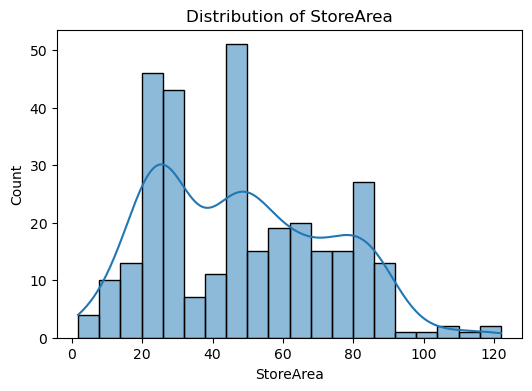

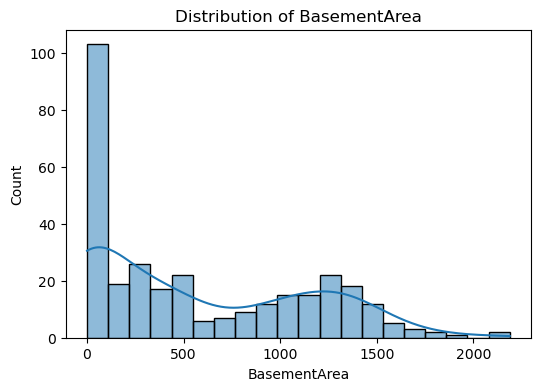

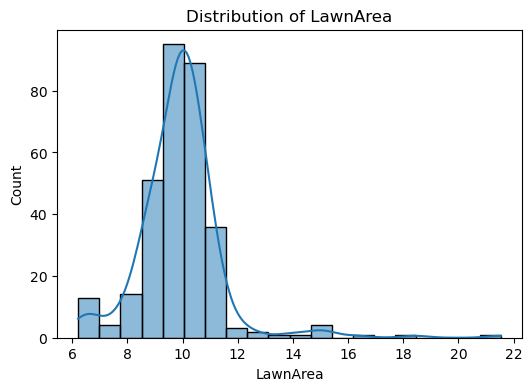

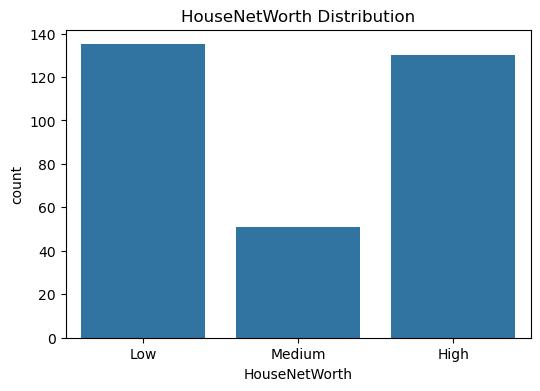

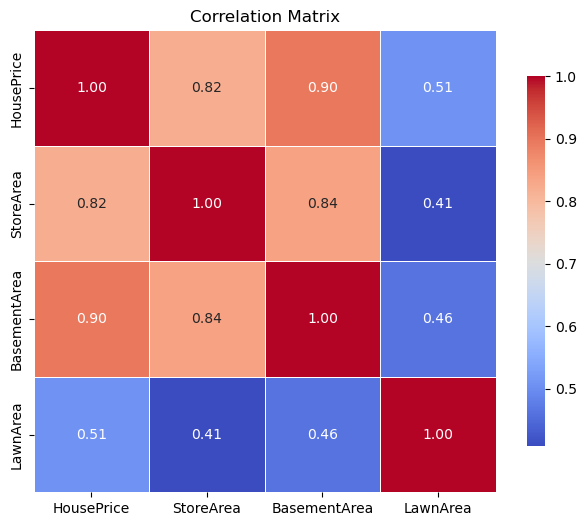

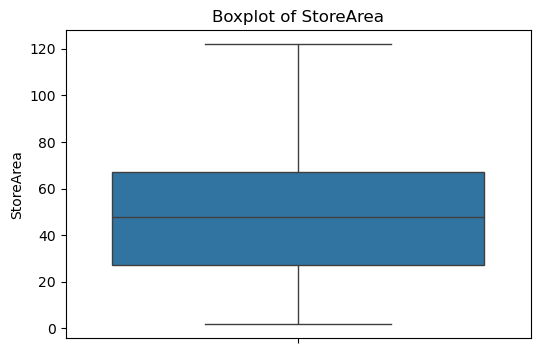

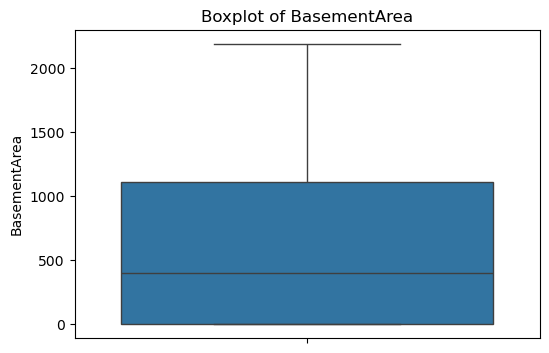

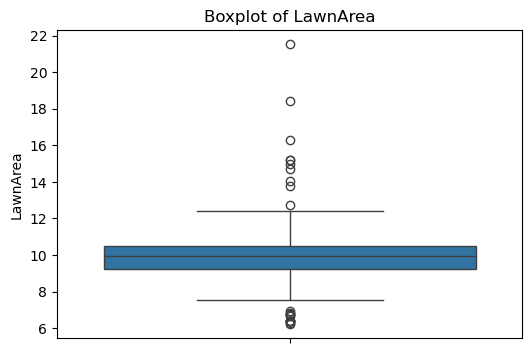

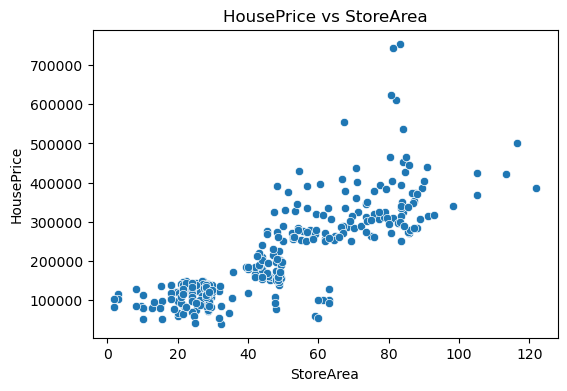

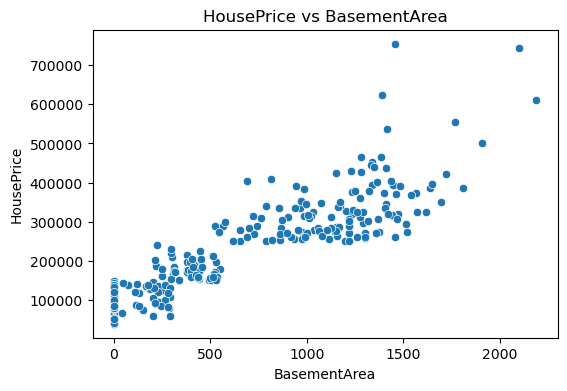

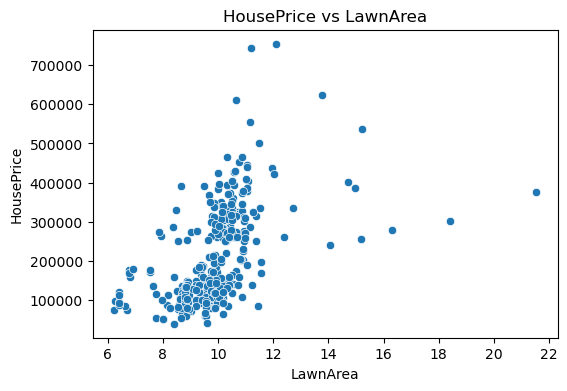

In [3]:
              #EXPLORATORY DATA ANALYSIS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'The data set.csv'
data = pd.read_csv(file_path)

# 1. Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# 2. Get basic statistics of numerical features
print("\nBasic statistics of the dataset:")
print(data.describe())

# 3. Visualize distributions of numerical features
numerical_cols = ['StoreArea', 'BasementArea', 'LawnArea']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# 4. Visualize categorical features (HouseNetWorth)
plt.figure(figsize=(6,4))
sns.countplot(x=data['HouseNetWorth'])
plt.title("HouseNetWorth Distribution")
plt.show()

# 5. Correlation matrix
plt.figure(figsize=(8,6))
numeric_data=data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink":.8})
plt.title("Correlation Matrix")
plt.show()

# 6. Outlier Detection with boxplots
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 7. Scatterplot of features vs target (HousePrice)
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data['HousePrice'])
    plt.title(f"HousePrice vs {col}")
    plt.show()    

In [5]:
                                 #DATA LOADING AND DATA PREPROCESSING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset= 'The data set.csv'
data = pd.read_csv(dataset)
data

# Encode the 'HouseNetWorth' column into numerical labels
label_encoder = LabelEncoder()
data['HouseNetWorth'] = label_encoder.fit_transform(data['HouseNetWorth'])

# Split the data into features and target
X = data.drop('HousePrice', axis=1)  # Features
y = data['HousePrice']               # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          #MODELLING AND EVALUATION

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Define ensemble models
rf_model = RandomForestRegressor(random_state=42)
ada_model = AdaBoostRegressor(random_state=42)
gboost_model = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gboost_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
ada_preds = ada_model.predict(X_test)
gboost_preds = gboost_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 Score
def evaluate_model(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

rf_eval = evaluate_model(y_test, rf_preds)
ada_eval = evaluate_model(y_test, ada_preds)
gboost_eval = evaluate_model(y_test, gboost_preds)
xgb_eval = evaluate_model(y_test, xgb_preds)

# Create a voting ensemble of all the models
voting_model = VotingRegressor(estimators=[('rf', rf_model), ('ada', ada_model), ('gboost', gboost_model), ('xgb', xgb_model)])
voting_model.fit(X_train, y_train)
voting_preds = voting_model.predict(X_test)
voting_eval = evaluate_model(y_test, voting_preds)

# Combine evaluation metrics
ensemble_results = {
    'Random Forest': rf_eval,
    'AdaBoost': ada_eval,
    'Gradient Boosting': gboost_eval,
    'XGBoost': xgb_eval,
    'Voting Ensemble': voting_eval
}

# Print evaluation results
for model_name, metrics in ensemble_results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Random Forest Performance:
MAE: 33876.2778
MSE: 3164018210.6697
R2: 0.8378

AdaBoost Performance:
MAE: 35754.8361
MSE: 2762498079.8978
R2: 0.8584

Gradient Boosting Performance:
MAE: 35704.5230
MSE: 3249418815.2633
R2: 0.8334

XGBoost Performance:
MAE: 41282.3394
MSE: 3870134445.6594
R2: 0.8016

Voting Ensemble Performance:
MAE: 34322.2957
MSE: 3006656727.2041
R2: 0.8458


In [ ]:
!pip install xgboost